In [9]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [155]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale,StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold
import warnings 
warnings.simplefilter(action='ignore')
sns.set()
plt.style.use("ggplot")
%matplotlib inline

In [156]:
#read the dataset from dir
df=pd.read_csv("diabetes.csv")

In [157]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [158]:
#Supervised or Unsupervised 
#ans:Supervised->target column
#Regression or classification problem?
#ans: classification

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [159]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [160]:
#descriptive stats of the dataset 
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [161]:
df.shape


(768, 9)

In [162]:
#distribution of the outcome variable 
df.Outcome.value_counts()*100/len(df)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

In [163]:
df['Outcome'].value_counts()*100/len(df)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Count'>

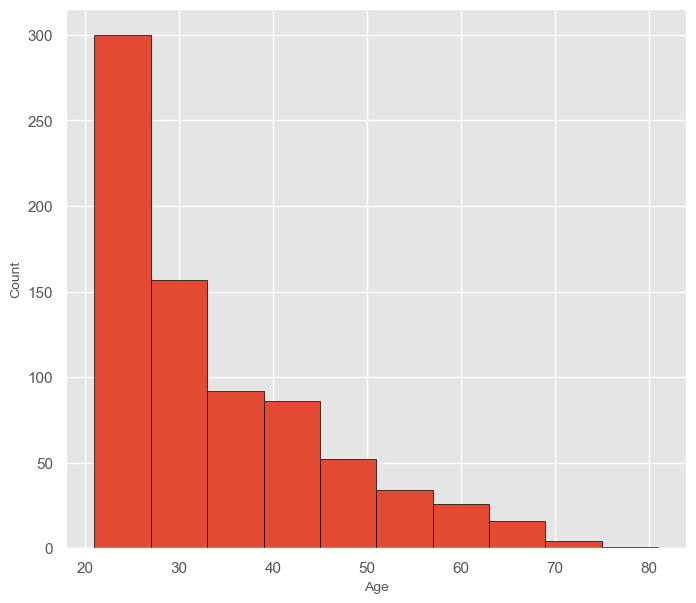

In [164]:
#plot the hist of the age variable 
plt.figure(figsize=(8,7))
plt.xlabel('Age',fontsize=10)
plt.ylabel('Count',fontsize=10)
df['Age'].hist(edgecolor="black")

In [165]:
df['Age'].max()

81

In [166]:
df['Age'].min()

21

In [167]:
print("MAX AGE:"+str(df['Age'].max()))
print("MIN AGE:"+str(df['Age'].min()))


MAX AGE:81
MIN AGE:21


In [168]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

<AxesSubplot:xlabel='Age', ylabel='Density'>

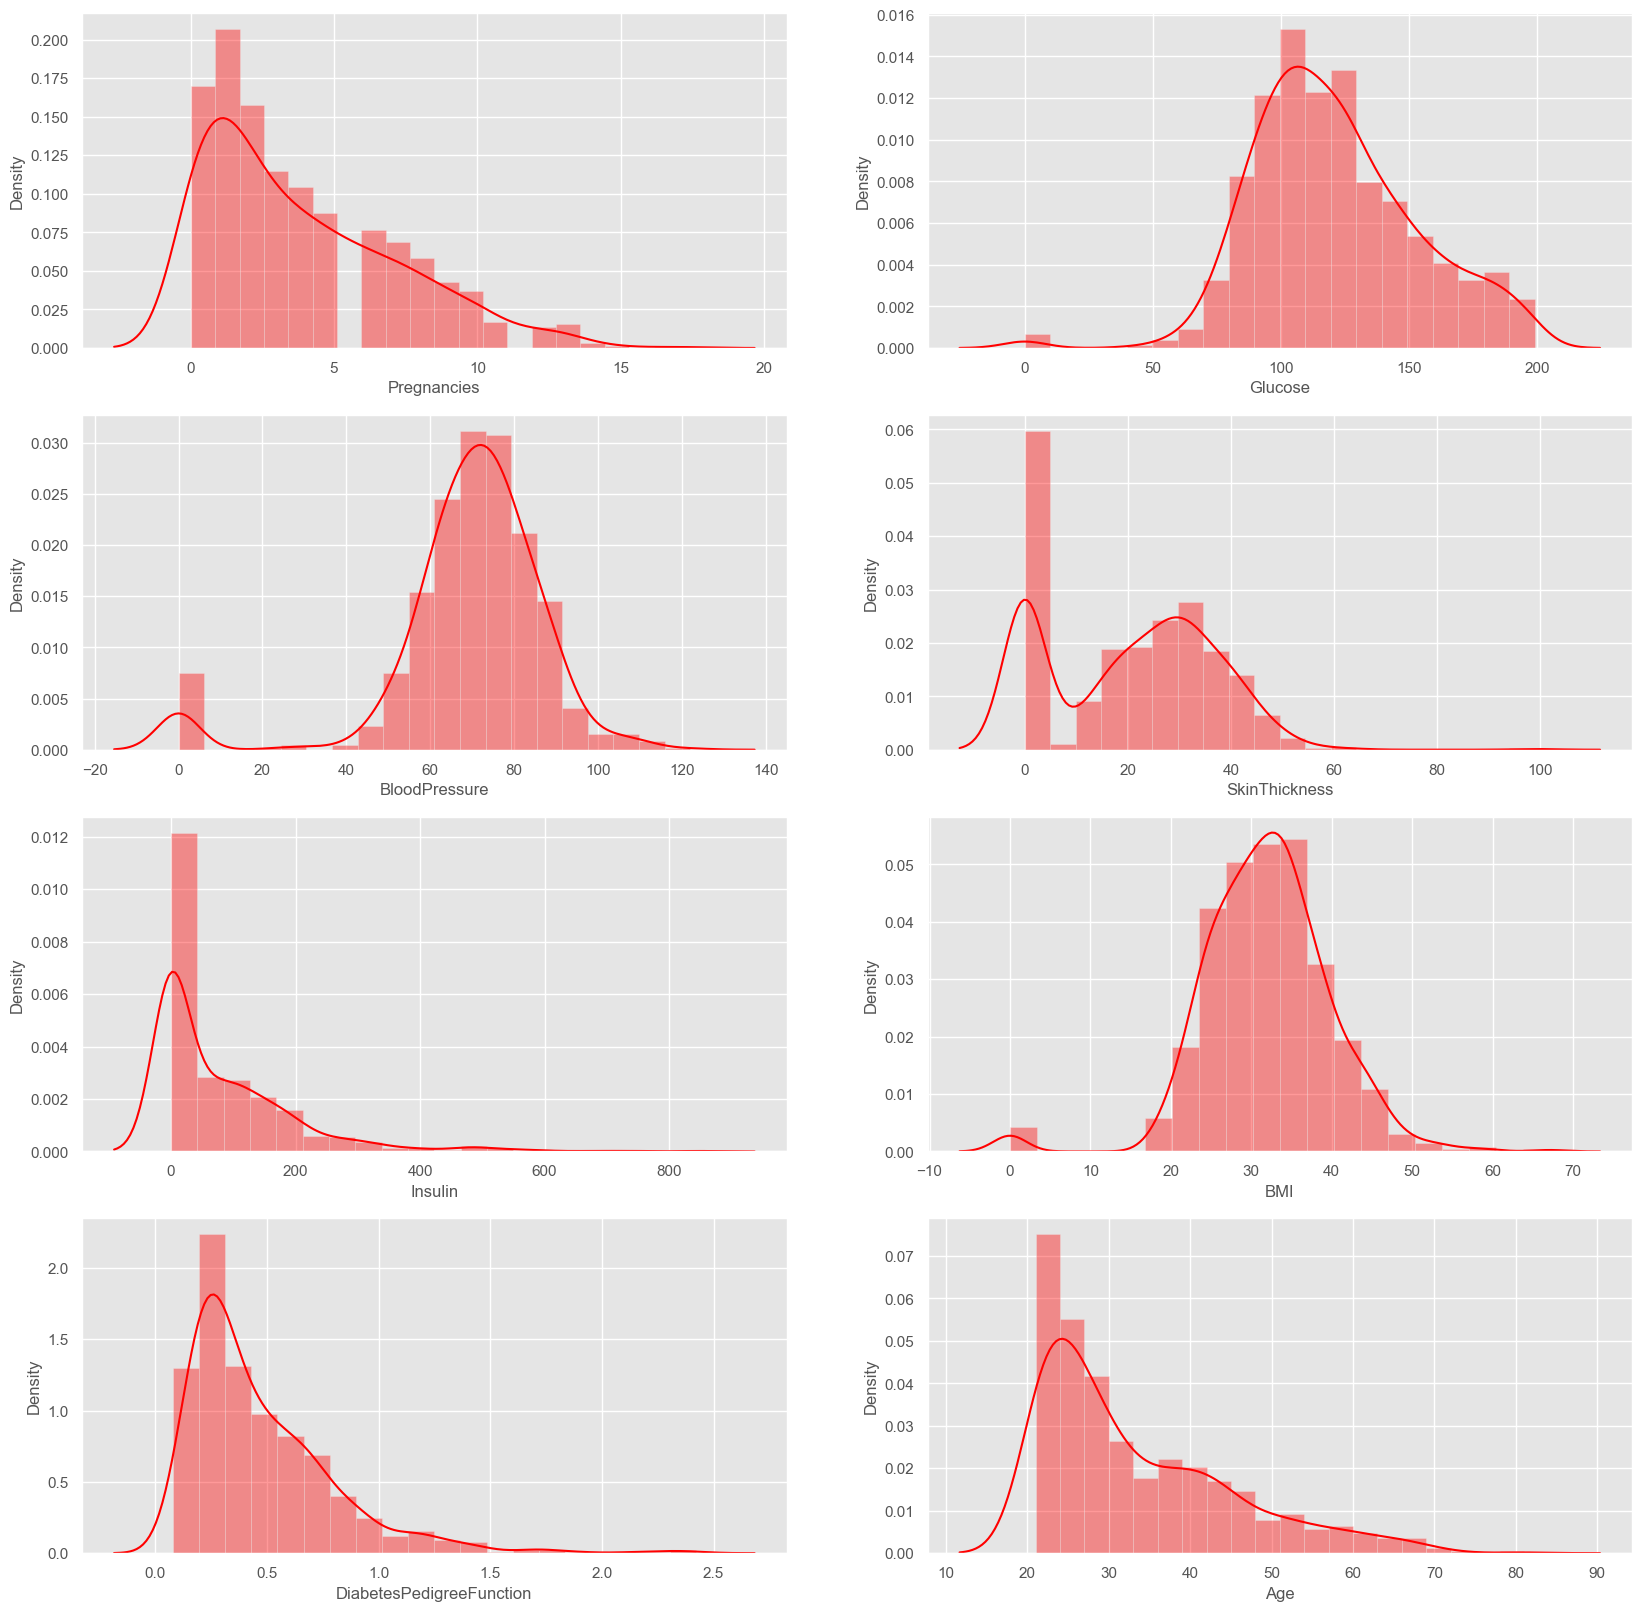

In [169]:
#density graph 
#4*2=8
#columns=2 figure
#having 4 row

#[0,0], [0,1]
#[1,0], [1,1]
#[2,0], [2,1]
#[3,0], [3,1]


fig,ax=plt.subplots(4,2, figsize=(20,20))
sns.distplot(df.Pregnancies, bins=20, ax=ax[0,0],color="red")
sns.distplot(df.Glucose, bins=20, ax=ax[0,1],color="red")
sns.distplot(df.BloodPressure, bins=20, ax=ax[1,0],color="red")
sns.distplot(df.SkinThickness, bins=20, ax=ax[1,1],color="red")
sns.distplot(df.Insulin, bins=20, ax=ax[2,0],color="red")
sns.distplot(df.BMI, bins=20, ax=ax[2,1],color="red")
sns.distplot(df.DiabetesPedigreeFunction, bins=20, ax=ax[3,0],color="red")
sns.distplot(df.Age, bins=20, ax=ax[3,1],color="red")



In [170]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [171]:
df.groupby("Outcome").agg({'Pregnancies':'mean'})

,Pregnancies
Outcome,
0,3.298000
1,4.865672


In [172]:
df.groupby("Outcome").agg({'Pregnancies':'max'})

,Pregnancies
Outcome,
0,13
1,17


In [173]:
df.groupby("Outcome").agg({'Glucose':'mean'})

,Glucose
Outcome,
0,109.980000
1,141.257463


In [174]:
df.groupby("Outcome").agg({'Glucose':'max'})

,Glucose
Outcome,
0,197
1,199


In [175]:
df.groupby("Outcome").agg({'BloodPressure':'mean'})

,BloodPressure
Outcome,
0,68.184000
1,70.824627


In [176]:
df.groupby("Outcome").agg({'BloodPressure':'max'})

,BloodPressure
Outcome,
0,122
1,114


In [177]:
df.groupby("Outcome").agg({'SkinThickness':'mean'})

,SkinThickness
Outcome,
0,19.664000
1,22.164179


In [178]:
df.groupby("Outcome").agg({'SkinThickness':'max'})

,SkinThickness
Outcome,
0,60
1,99


In [179]:
df.groupby("Outcome").agg({'Insulin':'mean'})

,Insulin
Outcome,
0,68.792000
1,100.335821


In [180]:
df.groupby("Outcome").agg({'Insulin':'max'})

,Insulin
Outcome,
0,744
1,846


In [181]:
df.groupby("Outcome").agg({'BMI':'mean'})

,BMI
Outcome,
0,30.304200
1,35.142537


In [182]:
df.groupby("Outcome").agg({'BMI':'max'})

,BMI
Outcome,
0,57.3
1,67.1


In [183]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [184]:
df.groupby("Outcome").agg({'DiabetesPedigreeFunction':'max'})

,DiabetesPedigreeFunction
Outcome,
0,2.329
1,2.420


In [185]:
df.groupby("Outcome").agg({'DiabetesPedigreeFunction':'mean'})

,DiabetesPedigreeFunction
Outcome,
0,0.429734
1,0.550500


In [186]:
df.groupby("Outcome").agg({'Age':'mean'})

,Age
Outcome,
0,31.190000
1,37.067164


In [187]:
df.groupby("Outcome").agg({'Age':'max'})

,Age
Outcome,
0,81
1,70


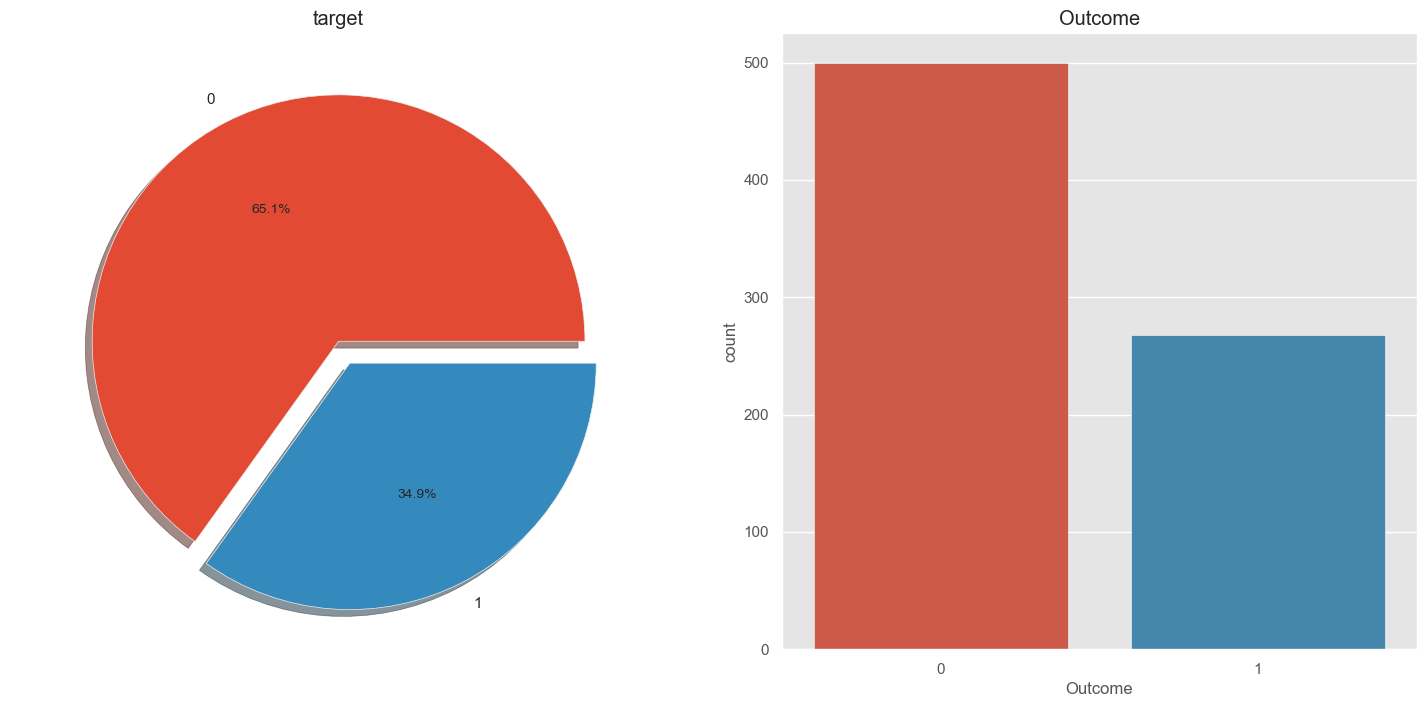

In [188]:
#0 =Healthy 
#1 =Affected 

f,ax = plt.subplots(1,2, figsize=(18,8))
df['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct= '%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel(' ')
sns.countplot('Outcome',data=df, ax=ax[1])
ax[1].set_title('Outcome')
plt.show()

In [189]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


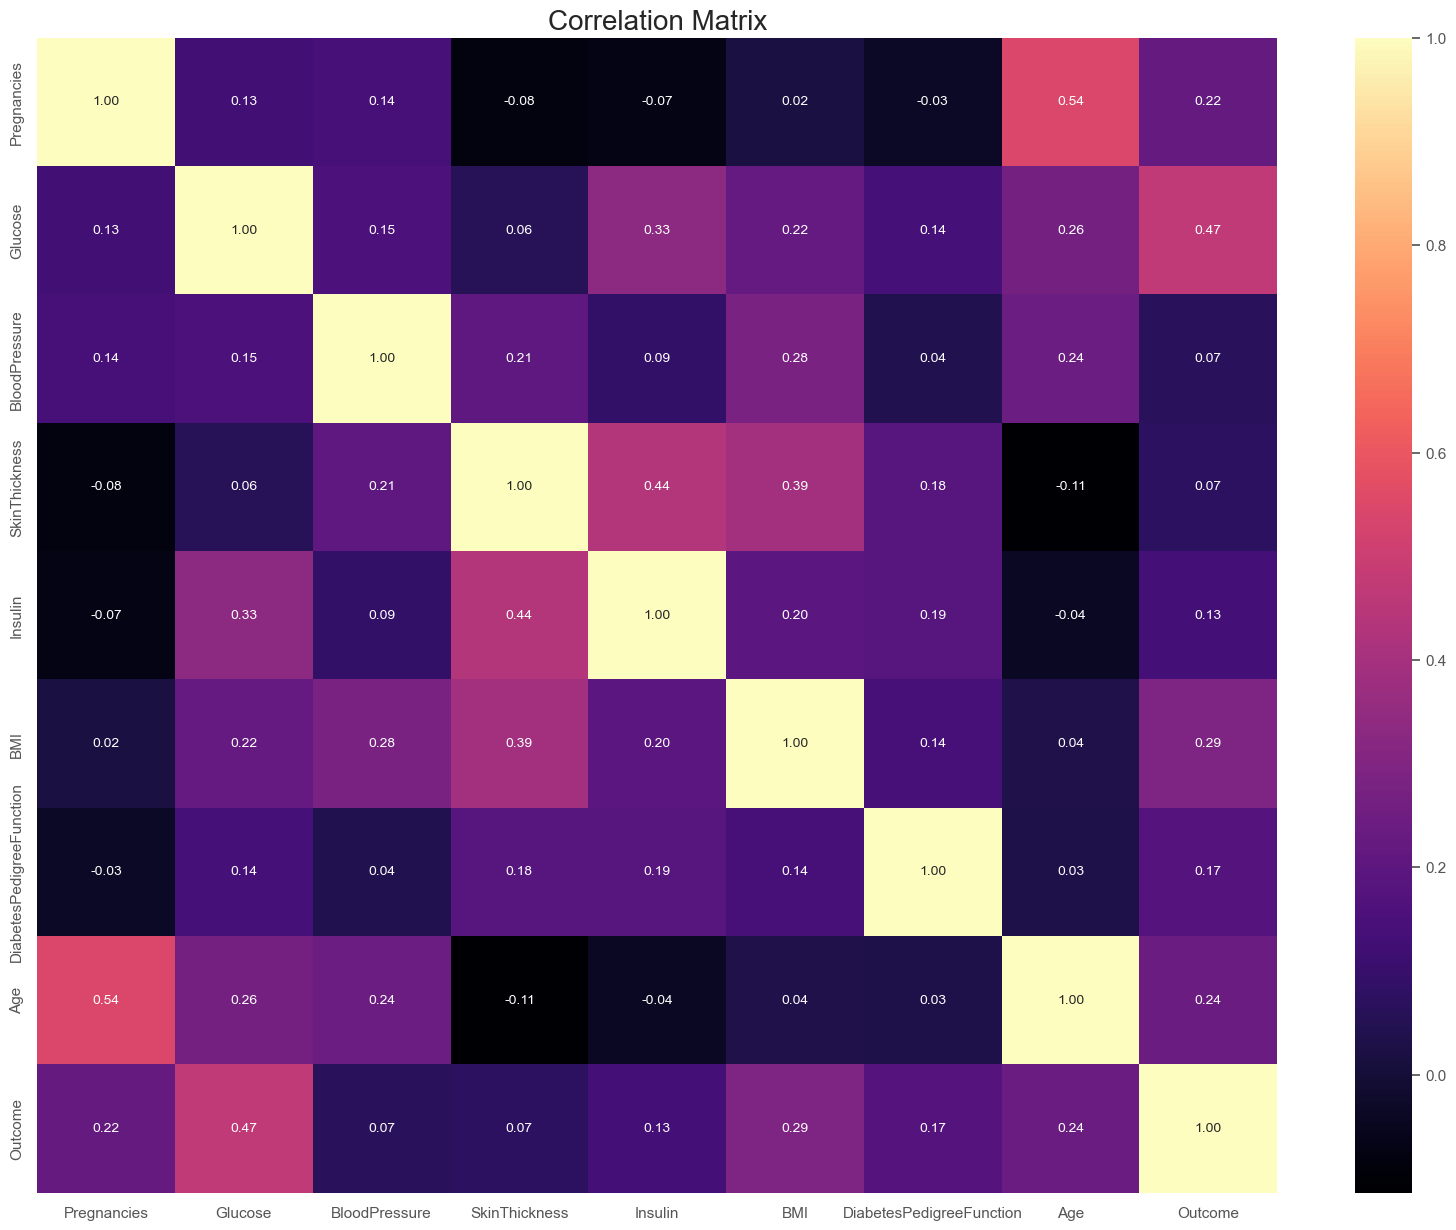

In [190]:
f,ax = plt.subplots(figsize=[20,15])
sns.heatmap(df.corr(), annot=True, fmt = '.2f', ax=ax, cmap='magma')
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()


In [191]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [192]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [193]:
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [194]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [195]:
df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0, np.NaN)

In [196]:
df.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [197]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8.0,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,NaN,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [198]:
pip install missingno


<AxesSubplot:>

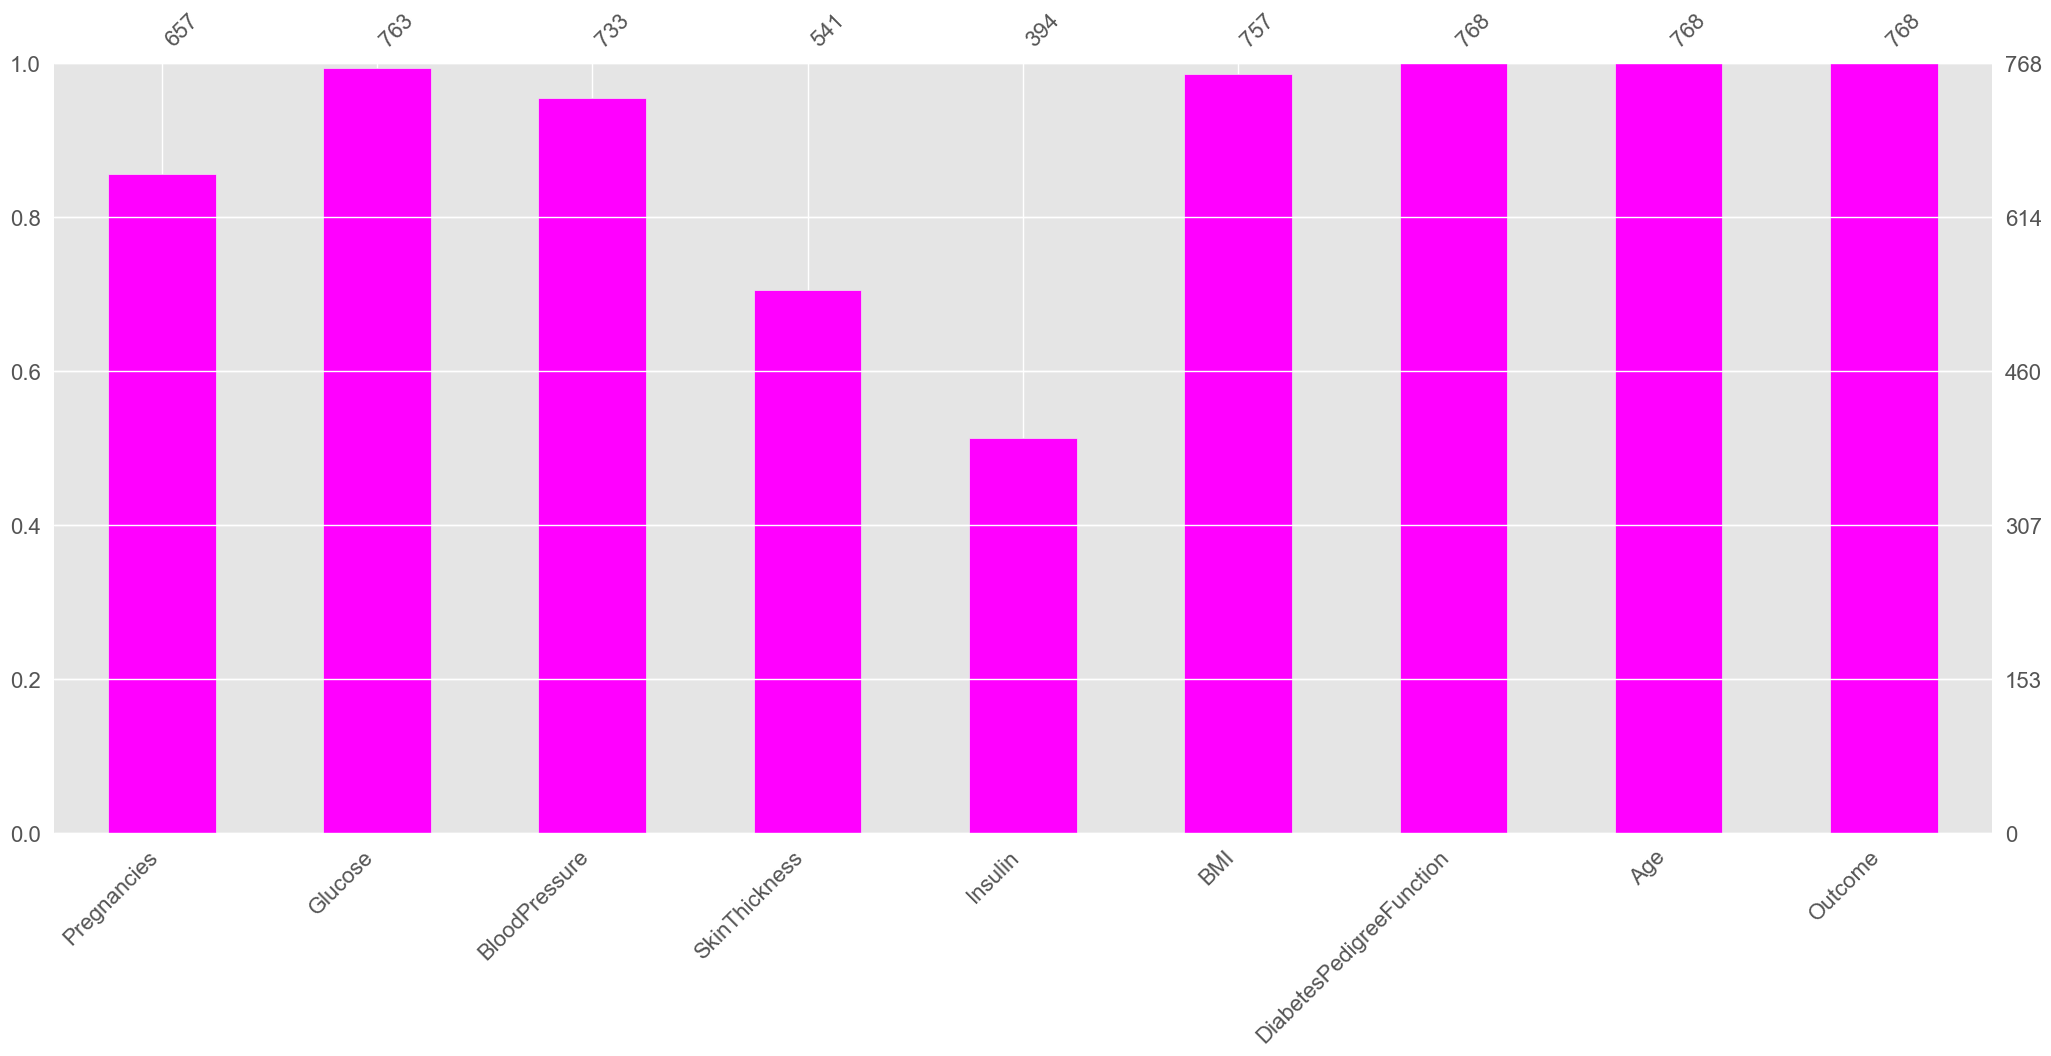

In [199]:
import missingno as msno
msno.bar(df, color="magenta")

In [200]:
def median_target(var):
    temp = df[df[var].notnull()]
    temp = temp[[var,'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp


In [201]:
columns = df.columns
columns = columns.drop('Outcome')
for i in columns:
    median_target(i)
    df.loc[(df['Outcome'] == 0) & (df[i].isnull()), i]=median_target(i)[i][0]
    df.loc[(df['Outcome'] == 1) & (df[i].isnull()), i]=median_target(i)[i][1]

In [202]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [203]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

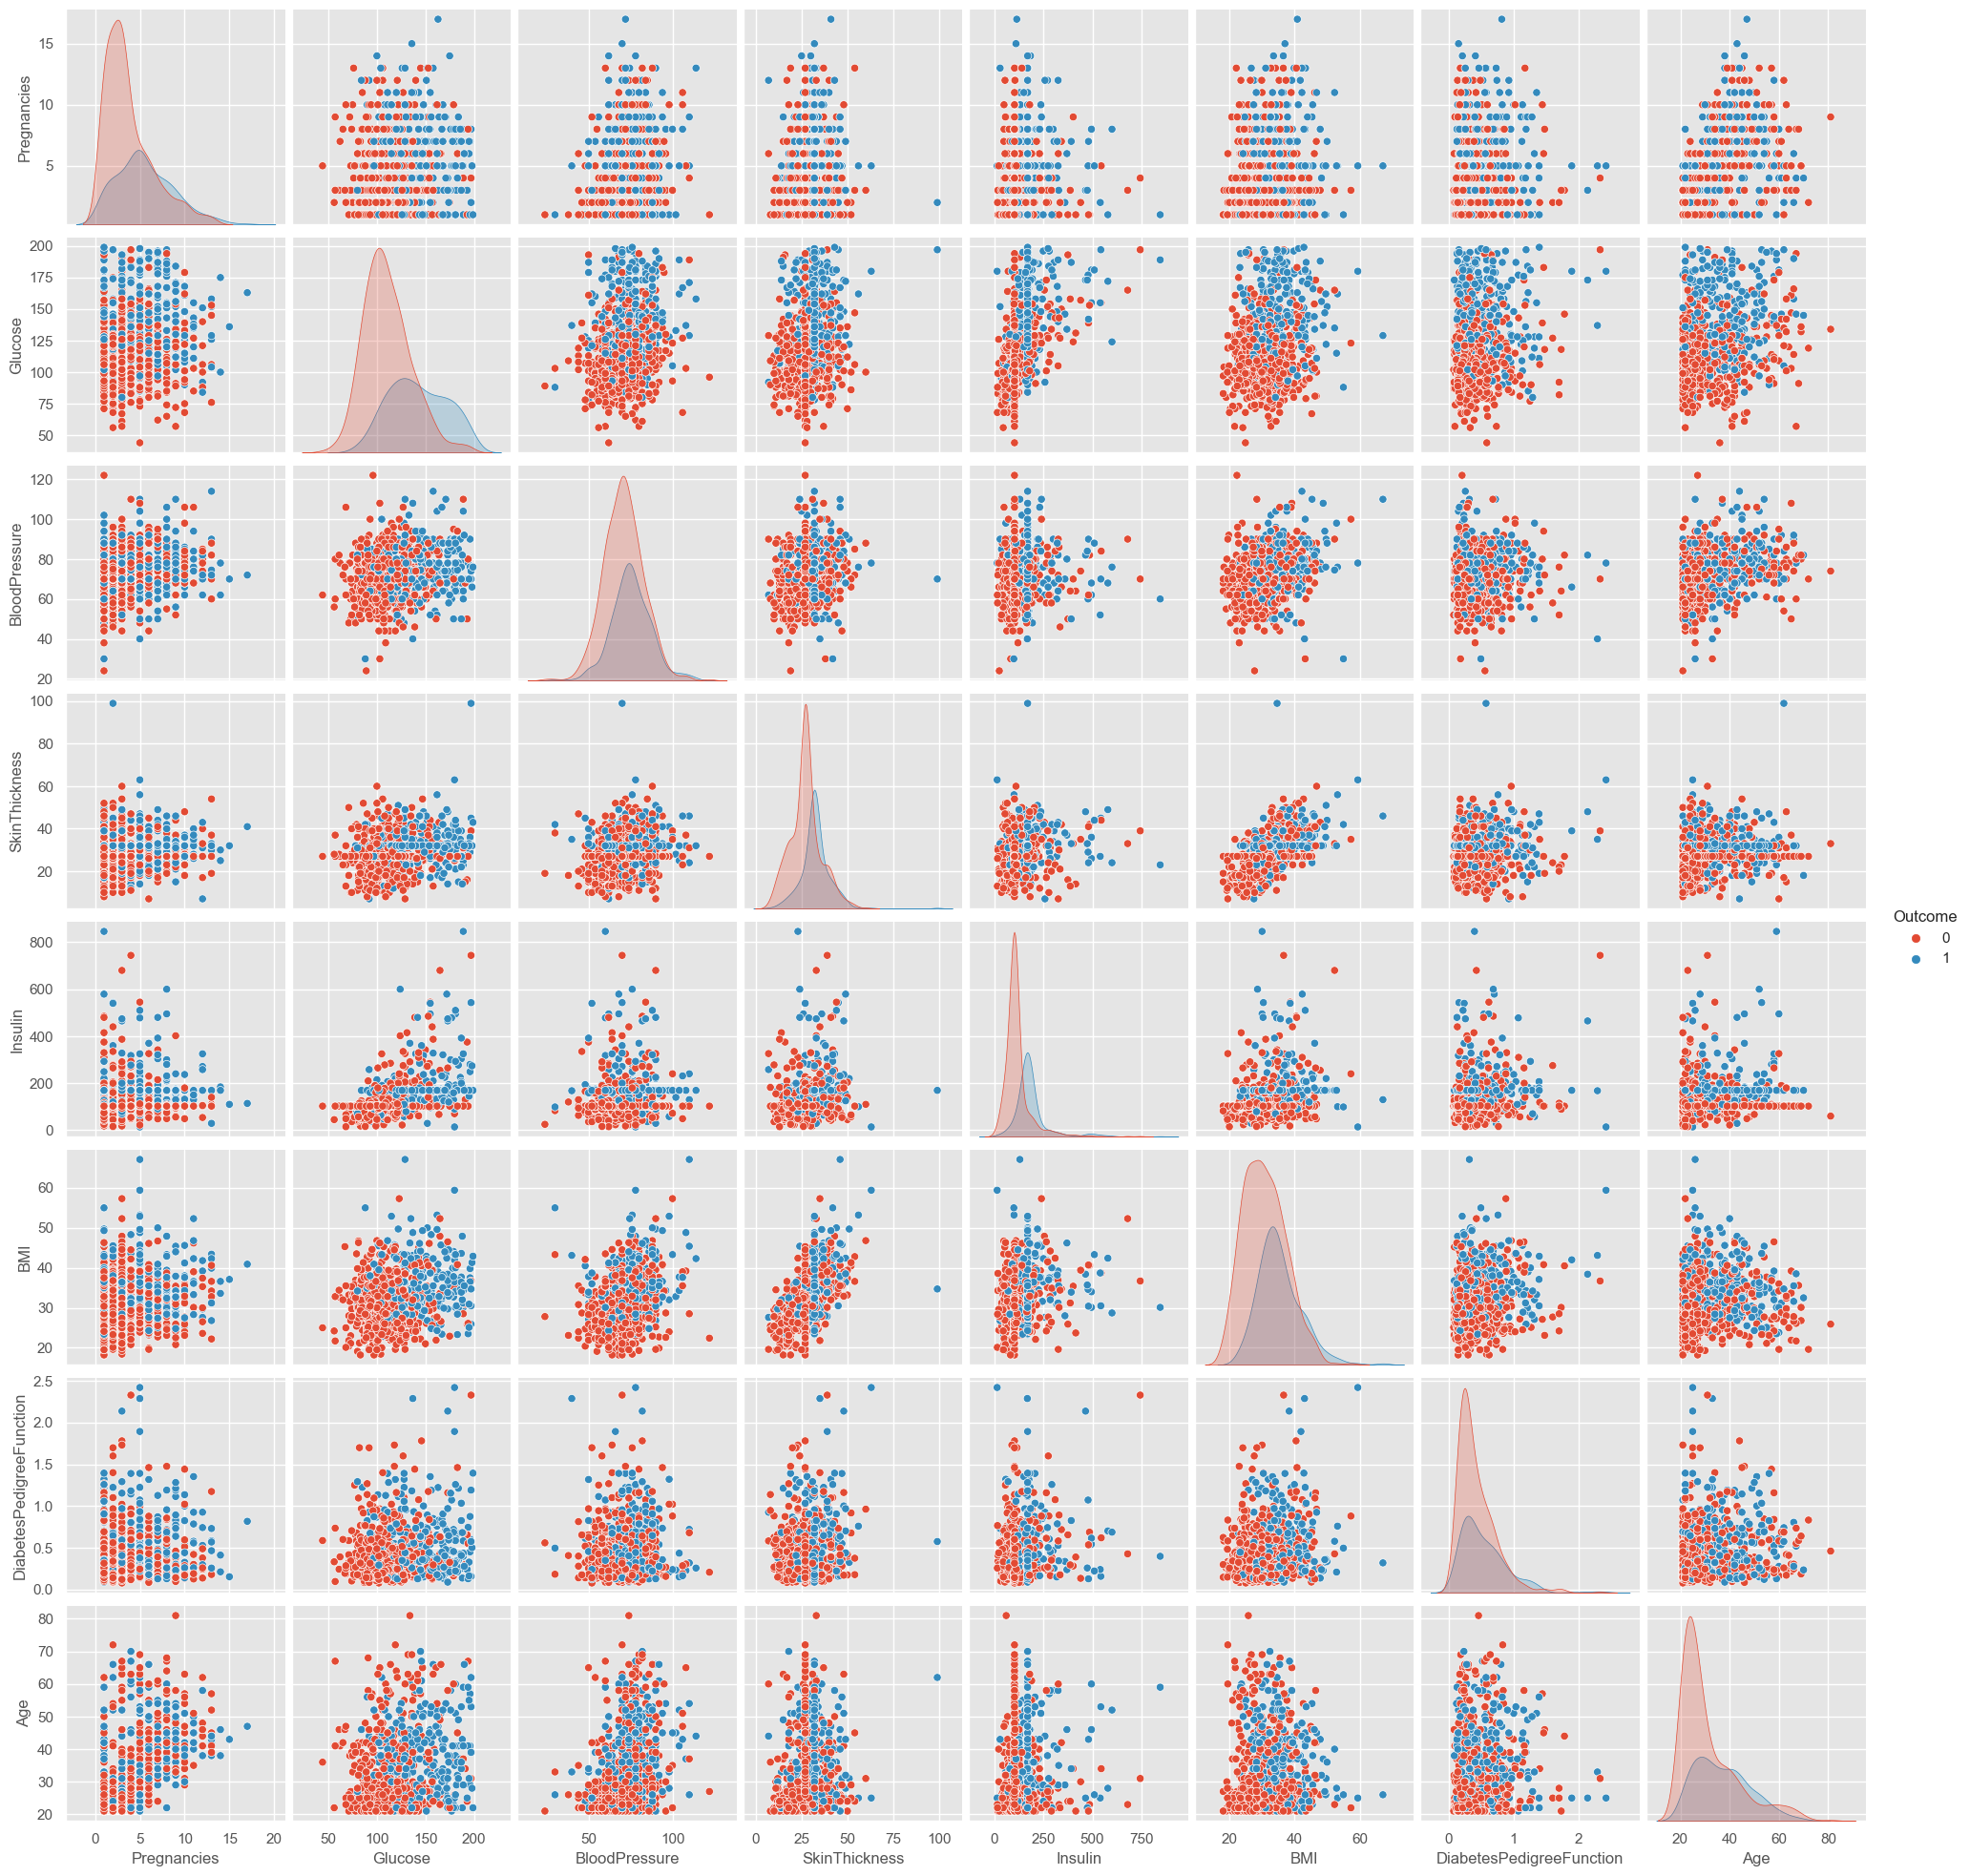

In [204]:
sns.pairplot(df, hue="Outcome")

In [205]:
#outlier detection 
#IQR

for feature in df:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    if df[(df[feature]>upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature,"no")

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


<AxesSubplot:xlabel='Insulin'>

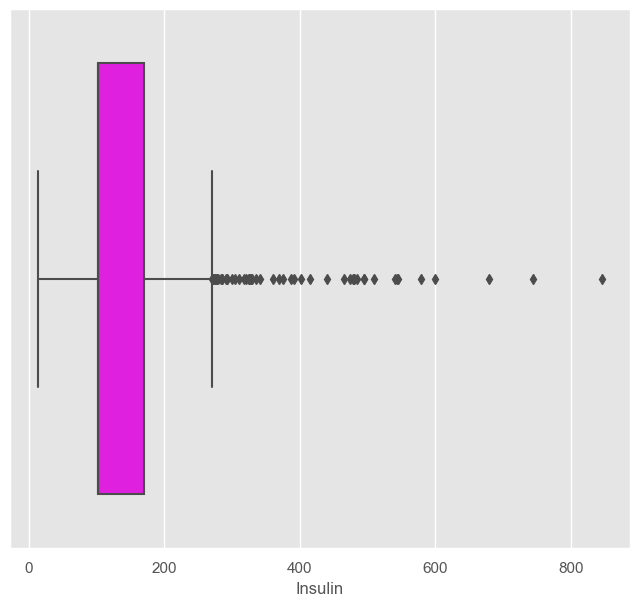

In [206]:
plt.figure(figsize=(8,7))
sns.boxplot(x = df["Insulin"], color="magenta")

In [207]:
Q1 = df.Insulin.quantile(0.25)
Q3 = df.Insulin.quantile(0.75)
IQR=Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR
df.loc[df['Insulin']>upper, "Insulin"] = upper


<AxesSubplot:xlabel='Insulin'>

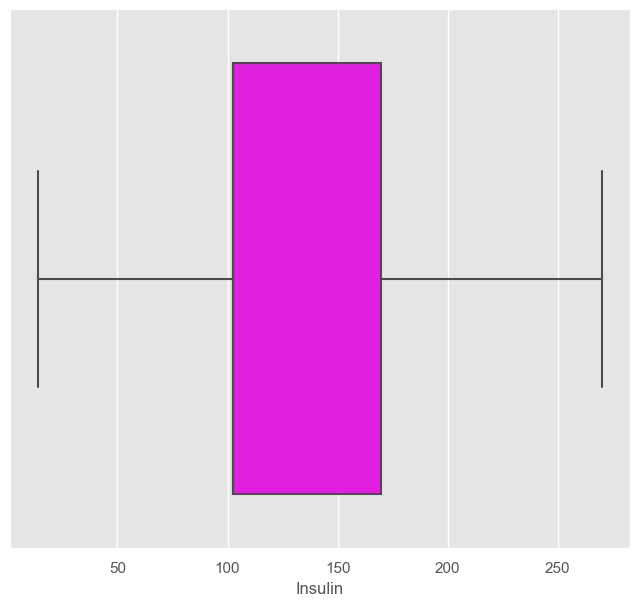

In [208]:
plt.figure(figsize=(8,7))
sns.boxplot(x = df["Insulin"], color="magenta")

In [209]:
#local outlier factor(LOF)
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=10)
lof.fit_predict(df)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1

In [210]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


<AxesSubplot:xlabel='Pregnancies'>

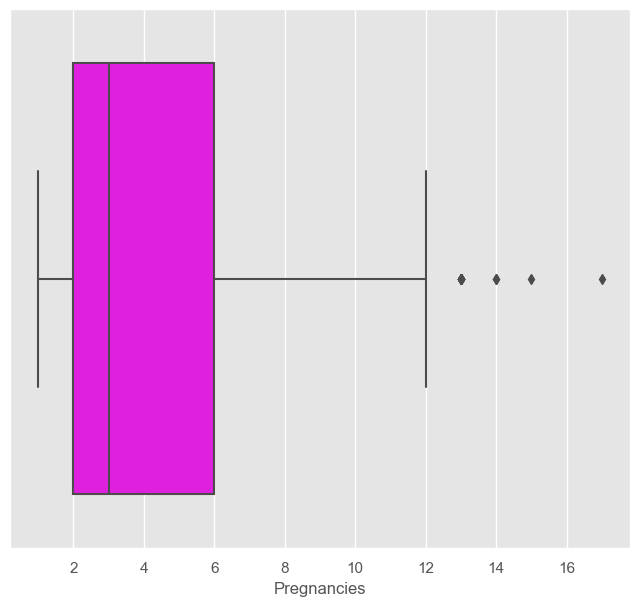

In [211]:
plt.figure(figsize=(8,7))
sns.boxplot(x = df["Pregnancies"], color="magenta")

In [212]:
df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:20]

array([-3.06509976, -2.38250393, -2.15557018, -2.11501347, -2.08356175,
       -1.95386655, -1.83559384, -1.74974237, -1.7330214 , -1.71017168,
       -1.70215105, -1.68722889, -1.64294601, -1.64180205, -1.61181746,
       -1.61067772, -1.60925053, -1.60214364, -1.59998552, -1.58761193])

In [213]:
threshold = np.sort(df_scores)[7]

In [214]:
threshold

-1.7497423670960557

In [215]:
outlier = df_scores>threshold

In [216]:
df = df[outlier]

In [217]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [218]:
df.shape

(760, 9)

<AxesSubplot:xlabel='Pregnancies'>

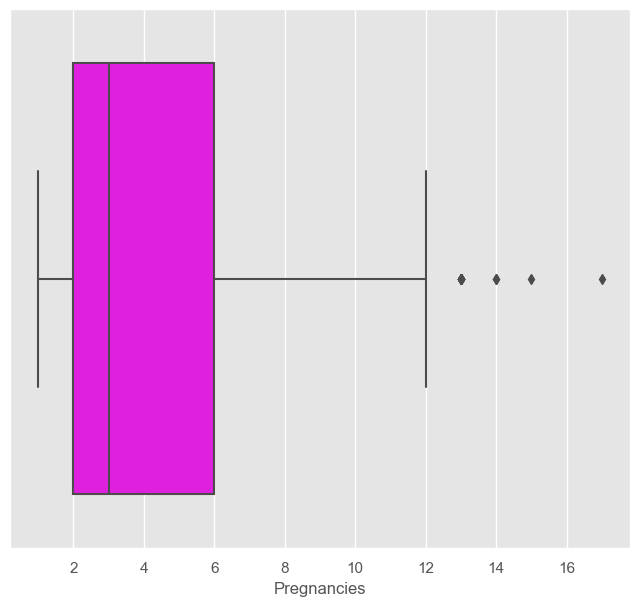

In [219]:
plt.figure(figsize=(8,7))
sns.boxplot(x = df["Pregnancies"], color="magenta")

In [220]:
#Feature Engineering 
NewBMI = pd.Series(["Underweight","Normal","Overweight","Obseity 1","Obesity 2","Obesity 3"],dtype = "category")


In [221]:
NewBMI

0    Underweight
1         Normal
2     Overweight
3      Obseity 1
4      Obesity 2
5      Obesity 3
dtype: category
Categories (6, object): ['Normal', 'Obesity 2', 'Obesity 3', 'Obseity 1', 'Overweight', 'Underweight']

In [222]:
df['NewBMI'] = NewBMI
df.loc[df["BMI"]<18.5, "NewBMI"] = NewBMI[0]
df.loc[(df["BMI"]>18.5)  & df["BMI"]<=24.9, "NewBMI"]= NewBMI[1]
df.loc[(df["BMI"]>24.9)  & df["BMI"]<=29.9, "NewBMI"]= NewBMI[2]
df.loc[(df["BMI"]>29.9)  & df["BMI"]<=34.9, "NewBMI"]= NewBMI[3]
df.loc[(df["BMI"]>34.9)  & df["BMI"]<=39.9, "NewBMI"]= NewBMI[4]
df.loc[df["BMI"]>39.9, "NewBMI"] = NewBMI[5]

In [223]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 2
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Obesity 2
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Obesity 2
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Obesity 2
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3


In [224]:
def set_insulin(row):
    if row["Insulin"]>=16 and row["Insulin"]<=166:
        return "Normal"
    else:
        return "Abnormal"

In [225]:
df= df.assign(NewInsulinScore=df.apply(set_insulin, axis=1))

In [226]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 2,Abnormal
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Obesity 2,Normal
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Obesity 2,Abnormal
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Obesity 2,Normal
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal


In [ ]:
df= pd.get_dummies(df, columns = ["NewBMI", "NewInsulinScore", "NewGlucose"], drop_first=True)


In [ ]:
df.head()

In [ ]:
df.columns

In [231]:
categorical_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Obseity 1,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,6,148,72,35,0.0,33.6,0.627,50,1,1,0,0,0,0,0,0,0,0,1
1,1,85,66,29,0.0,26.6,0.351,31,0,1,0,0,0,0,0,0,1,0,0
2,8,183,64,0,0.0,23.3,0.672,32,1,1,0,0,0,0,0,0,0,0,1
3,1,89,66,23,94.0,28.1,0.167,21,0,1,0,0,0,0,1,0,1,0,0
4,0,137,40,35,168.0,43.1,2.288,33,1,0,1,0,0,0,0,0,0,0,1


In [233]:
cols = X.columns
index = X.index

In [234]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50,1,Obesity 2,Abnormal,Low
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31,0,Obesity 2,Normal,Normal
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32,1,Obesity 2,Abnormal,Overweight
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21,0,Obesity 2,Normal,Secret
4,5.0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,Obesity 3,Abnormal,High


In [235]:
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X=transformer.transform(X)
X=pd.DataFrame(X, columns = cols, index = index)

In [236]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Glucose,...,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Obseity 1,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,0.6,0.738095,0.000000,0.37500,-0.282398,0.172043,0.663192,1.235294,0.6,0.738095,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.4,-0.761905,-0.333333,0.18750,-0.282398,-0.580645,-0.056026,0.117647,-0.4,-0.761905,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,1.571429,-0.444444,-0.71875,-0.282398,-0.935484,0.780456,0.176471,1.0,1.571429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.4,-0.666667,-0.333333,0.00000,0.444874,-0.419355,-0.535505,-0.470588,-0.4,-0.666667,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,-0.6,0.476190,-1.777778,0.37500,1.017408,1.193548,4.991531,0.235294,-0.6,0.476190,...,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [237]:
X=pd.concat([X, categorical_df], axis=1)


In [238]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Glucose,...,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Obseity 1,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,0.6,0.738095,0.000000,0.37500,-0.282398,0.172043,0.663192,1.235294,0.6,0.738095,...,1,0,0,0,0,0,0,0,0,1
1,-0.4,-0.761905,-0.333333,0.18750,-0.282398,-0.580645,-0.056026,0.117647,-0.4,-0.761905,...,1,0,0,0,0,0,0,1,0,0
2,1.0,1.571429,-0.444444,-0.71875,-0.282398,-0.935484,0.780456,0.176471,1.0,1.571429,...,1,0,0,0,0,0,0,0,0,1
3,-0.4,-0.666667,-0.333333,0.00000,0.444874,-0.419355,-0.535505,-0.470588,-0.4,-0.666667,...,1,0,0,0,0,1,0,1,0,0
4,-0.6,0.476190,-1.777778,0.37500,1.017408,1.193548,4.991531,0.235294,-0.6,0.476190,...,0,1,0,0,0,0,0,0,0,1


In [239]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)


In [240]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [241]:
#MACHINE LEARNING ALGORITHM

In [242]:
#Logistic Regression

In [243]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [244]:
y_pred = log_reg.predict(X_test)

In [245]:
accuracy_score(y_train, log_reg.predict(X_train))

0.84375

In [246]:
accuracy_score(y_test, log_reg.predict(X_test))

0.875

In [247]:
confusion_matrix(y_test, y_pred)

array([[88, 10],
       [ 9, 45]], dtype=int64)

In [248]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90        98
           1       0.82      0.83      0.83        54

    accuracy                           0.88       152
   macro avg       0.86      0.87      0.86       152
weighted avg       0.88      0.88      0.88       152

